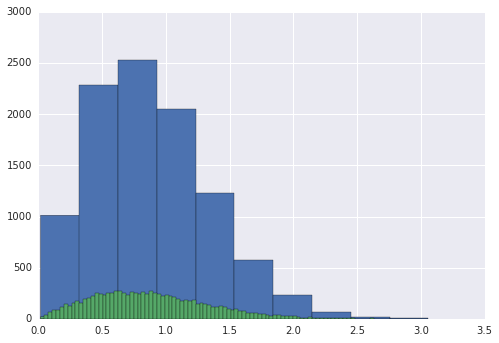

In [9]:
import seaborn as sns
from numpy.random import weibull

Nsamples = 1e4

# generate a weibull distribution
k=2
x = weibull(k,(Nsamples,))

partition1, binlocs1, _ = hist(x,10);
partition2, binlocs2, _ = hist(x,100);

# these should evaluate to the same thing:
#print partition1[0]
#print sum(partition2[0:10])


In [11]:
# Now dump this to a JSON file
import json

tree = {}
tree['name'] = 'root'
tree['freq'] = sum(partition1[:])/Nsamples

children = []
for c1 in range(len(partition1)):
    child = {}
    child['name'] = 'Blue Bin %d'%(c1+1)
    child['freq'] = partition1[c1]/Nsamples

    grandchildren = []
    for c2 in range(len(partition2)):
        if c2>=c1*10 and c2<((c1+1)*10):
            grandchild = {}
            grandchild['name'] = 'Blue Bin %d, Green Bin %d'%(c1+1,c2+1)
            grandchild['freq'] = partition2[c2]/Nsamples
            grandchildren.append(grandchild)
    
    child['children'] = grandchildren
    children.append(child)

tree['children'] = children

with open('sunburst_nest_tree.json','w') as f:
    json.dump(tree,f,sort_keys=True,indent=4,separators=(',', ': '))

print "Done printing nested tree JSON to file."

Done printing nested tree JSON to file.
